# Load Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer

In [2]:
# Read csv file as DataFrame
df = pd.read_csv('ObesityDataSet1.csv')

# About Dataset

Obesitas merupakan kondisi medis kompleks yang ditandai oleh penumpukan lemak tubuh berlebihan, yang dapat meningkatkan risiko masalah kesehatan serius seperti penyakit jantung, diabetes, dan tekanan darah tinggi.

Berdasarkan dataset "Obesitas Level", berbagai faktor gaya hidup seperti kebiasaan makan, aktivitas fisik, dan konsumsi air digunakan. Variabel target, NObeyesdad, mengklasifikasikan tingkat obesitas (mulai dari Berat Badan Kurang hingga Obesitas Tipe III), sehingga cocok untuk klasifikasi multiclass. Dengan model machine learning terbaik yang diimplementasikan menggunakan FastAPI (backend) dan Streamlit (frontend), aplikasi ini memungkinkan prediksi tingkat obesitas real-time, bertujuan mengedukasi dan mendorong gaya hidup sehat.

- Gender = Laki-laki atau Wanita 
- Age = Usia seseorang dalam tahun 
- Height = Tinggi dalam meter 
- Weight = Berat dalam kilogram 
- family_history_with_overweight = Apakah orang tersebut memiliki riwayat keluarga dengan kelebihan berat badan 
- FAVC = Jika orang tersebut sering mengonsumsi makanan berkalori tinggi (ya/tidak) 
- FCVC = Frekuensi konsumsi sayuran (skala dari 1 hingga 3) 
- NCP = Jumlah makanan utama per hari 
- CAEC = Frekuensi mengonsumsi makanan di antara waktu makan (Tidak pernah, Kadang-kadang, Sering, Selalu) 
- SMOKE = Apakah orang tersebut merokok (ya/tidak) 
- CH2O = Asupan air harian (skala dari 1 hingga 3) 
- SCC = Jika orang tersebut memantau asupan kalori mereka (ya/tidak) 
- FAF = Frekuensi aktivitas fisik (skala dari 0 hingga 3) 
- TUE =  Waktu yang dihabiskan untuk menggunakan teknologi (skala dari 0 hingga 3) 
- CALC = Frekuensi konsumsi alkohol (Tidak pernah, Kadang-kadang, Sering, Selalu) 
- MTRANS = Moda transportasi utama (Mobil, Sepeda, Sepeda Motor, Transportasi Umum, Jalan Kaki) 
- NObeyesedad = Tingkat obesitas (Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, Obesity Type III)

In [3]:
# Show the first 5 rows
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,31,1.87,128.87,yes,yes,2.96,3.00,Sometimes,yes,1.28,no,0.90,1.875,Sometimes,Automobile,Obesity_Type_II
1,Female,18,1.59,40.00,yes,yes,2.00,1.00,Frequently,no,1.00,no,0.00,2.000,no,Public_Transportation,Insufficient_Weight
2,Female,44 years,1.59,77.00,yes,yes,2.00,3.00,Sometimes,no,2.81,no,0.00,0.000,Sometimes,Automobile,Obesity_Type_I
3,Male,31,1.68,102.00,yes,yes,2.94,2.14,Sometimes,no,1.25,no,1.18,0.778,no,Public_Transportation,Obesity_Type_II
4,Male,22,1.74,75.00,yes,yes,3.00,3.00,Frequently,no,1.00,no,1.00,0.000,no,Automobile,Normal_Weight


In [4]:
# Show the last 5 rows
df.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1050,Female,19,1.62,69.98,yes,yes,2.25,2.75,Sometimes,no,2.33,no,0.82,0.024,no,Public_Transportation,Overweight_Level_I
1051,Male,27,1.78,113.15,yes,yes,2.22,3.00,Sometimes,no,2.09,no,0.55,1.743,Sometimes,Automobile,Obesity_Type_II
1052,Male,23,1.72,70.00,no,no,2.00,3.00,Sometimes,no,2.00,no,3.00,1.000,Frequently,Public_Transportation,Normal_Weight
1053,Male,21,1.86,89.56,yes,yes,2.00,3.00,Sometimes,no,1.01,no,0.00,0.798,Sometimes,Public_Transportation,Overweight_Level_I
1054,Male,22,1.74,94.00,yes,yes,2.00,3.00,Sometimes,no,2.00,no,0.00,0.000,Sometimes,Public_Transportation,Obesity_Type_I


In [5]:
# Shape of the dataset
df.shape

(1055, 17)

In [6]:
# Knowing all columns that consists in the dataset
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1055 non-null   object 
 1   Age                             1055 non-null   object 
 2   Height                          1055 non-null   float64
 3   Weight                          1055 non-null   float64
 4   family_history_with_overweight  1055 non-null   object 
 5   FAVC                            1055 non-null   object 
 6   FCVC                            1055 non-null   float64
 7   NCP                             1055 non-null   float64
 8   CAEC                            1029 non-null   object 
 9   SMOKE                           1055 non-null   object 
 10  CH2O                            1055 non-null   float64
 11  SCC                             1055 non-null   object 
 12  FAF                             10

Langkah pertama setelah memuat data adalah mengecek struktur dari dataset itu sendiri. Hal ini dilakukan untuk mengetahui shape (jumlah baris dan kolom), columns (nama-nama kolom), hingga info yang menampilkan detail setiap kolom dan tipe datanya. Berdasarkan pengecekan, diketahui bahwa dataset ini terdiri dari 1055 entri (baris data) dan 17 kolom. Kolom-kolom tersebut terbagi atas dua jenis, yaitu numerik dan kategorik.

In [8]:
df.describe()

,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1018.000000
mean,1.703175,86.674521,2.422701,2.719649,2.018114,1.033118,0.676977
std,0.095162,26.213231,0.529695,0.749590,0.613095,0.850566,0.603165
min,1.460000,39.370000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.630000,65.135000,2.000000,2.765000,1.620000,0.160000,0.003250
50%,1.700000,83.150000,2.400000,3.000000,2.000000,1.000000,0.672500
75%,1.770000,107.125000,3.000000,3.000000,2.500000,1.730000,1.000000
max,1.980000,160.640000,3.000000,4.000000,3.000000,3.000000,2.000000


Berdasarkan statistik deskriptif pada tipe data numerik:

- Tinggi (Height): Rata-rata tinggi responden adalah 1.70 meter, dengan tinggi bervariasi dari 1.46 meter hingga 1.98 meter.
- Berat (Weight): Rata-rata berat responden adalah 86.67 kg, menunjukkan variasi yang cukup signifikan, dari 39.37 kg hingga 160.64 kg.
- Kebiasaan Makan (FCVC, NCP): Frekuensi konsumsi sayur rata-rata 2.42 (rentang 1-3) dan jumlah makanan utama rata-rata 2.71 kali per hari (rentang 1-4).
- Kebiasaan Minum (CH2O): Rata-rata asupan air harian 2.01 (rentang 1-3).
- Gaya Hidup (FAF, TUE): Frekuensi aktivitas fisik rata-rata 1.03 (rentang 0-3), dan waktu penggunaan teknologi rata-rata 0.67 jam per hari (rentang 0-2).

In [9]:
df.duplicated().sum()

np.int64(9)

In [10]:
df.isnull().sum()

Gender                             0
Age                                0
Height                             0
Weight                             0
family_history_with_overweight     0
FAVC                               0
FCVC                               0
NCP                                0
CAEC                              26
SMOKE                              0
CH2O                               0
SCC                                0
FAF                                0
TUE                               37
CALC                               0
MTRANS                             0
NObeyesdad                         0
dtype: int64

Selanjutnya, setelah pengecekan awal, kita dapat mengetahui bahwa dalam dataset terdapat data duplikat sebanyak 9 baris yang perlu ditangani. Selain itu, terdapat nilai kosong (isnull) pada kolom CAEC sebanyak 26 entri dan pada kolom TUE sebanyak 37 entri, yang mana keduanya juga perlu kita atasi dalam tahap data cleaning.

# Handle Inconsistency

## Numerical Inconsistency

Data cleaning yang dilakukan pertama kali adalah penanganan inkonsistensi data (handle inconsistency). Seperti yang dapat dilihat pada kolom numerik Age, terdapat inkonsistensi data dengan adanya kata "years". Maka, kata tersebut akan dihilangkan agar selaras, dan tipe data Age akan diubah dari object menjadi int.

In [11]:
print(sorted(df['Age'].unique()))

['16', '17', '18', '18 years', '19', '19 years', '20', '20 years', '21', '21 years', '22', '22 years', '23', '23 years', '24', '25', '26', '26 years', '27', '28', '29', '30', '31', '32', '32 years', '33', '33 years', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '44 years', '45', '47', '51', '52', '55', '56', '61']


In [12]:
df['Age'] = df['Age'].str.replace('years', '').str.strip()
df['Age'] = pd.to_numeric(df['Age'], errors='coerce') 
df['Age'].unique()

array([31, 18, 44, 22, 21, 25, 56, 24, 19, 23, 41, 20, 26, 35, 28, 17, 33,
       27, 40, 39, 30, 32, 37, 38, 42, 34, 29, 16, 52, 61, 43, 36, 55, 51,
       45, 47])

In [13]:
print(df['Age'].dtype)

int64


## Categorical Inconsistency

In [14]:
def check_categorical_consistency(df, threshold=20):
    """
    Prints unique values of categorical columns to check for inconsistencies
    like 'yes', 'Yes', 'YES' or extra whitespace.

    Parameters:
    - df: pandas DataFrame
    - threshold: max number of unique values to consider a column categorical
    """
    print("Checking for categorical inconsistencies:\n")
    for col in df.columns:
        if df[col].dtype == 'object' or df[col].nunique() <= threshold:
            unique_values = df[col].dropna().unique()
            print(f"Column: {col}")
            print(f"Unique values ({len(unique_values)}): {unique_values}\n")
check_categorical_consistency(df)

Checking for categorical inconsistencies:

Column: Gender
Unique values (2): ['Male' 'Female']

Column: family_history_with_overweight
Unique values (2): ['yes' 'no']

Column: FAVC
Unique values (2): ['yes' 'no']

Column: CAEC
Unique values (4): ['Sometimes' 'Frequently' 'Always' 'no']

Column: SMOKE
Unique values (2): ['yes' 'no']

Column: SCC
Unique values (2): ['no' 'yes']

Column: CALC
Unique values (3): ['Sometimes' 'no' 'Frequently']

Column: MTRANS
Unique values (5): ['Automobile' 'Public_Transportation' 'Walking' 'Bike' 'Motorbike']

Column: NObeyesdad
Unique values (7): ['Obesity_Type_II' 'Insufficient_Weight' 'Obesity_Type_I' 'Normal_Weight'
 'Overweight_Level_II' 'Overweight_Level_I' 'Obesity_Type_III']



Sama halnya dengan data numerik, untuk tipe data kategorik, kita melakukan pengecekan unique value untuk mengetahui konsistensi dan variasi data di dalamnya.

Lalu, dilanjutkan dengan proses handling atau penanganan data. Ini dilakukan dengan mengubah semua teks menjadi huruf kecil (lowercase), menghilangkan karakter garis bawah (_), dan mengubah beberapa unique value agar sesuai dengan deskripsi dataset yang telah diberikan.

In [15]:
def handle_inconsistencies(df):
    import pandas as pd

    # --- 1. Clean 'Age' column: remove 'years', convert to numeric ---
    df['Age'] = df['Age'].astype(str).str.replace('years', '', regex=False).str.strip()
    df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

    # --- 2. Normalize categorical columns (lowercase, strip) ---
    categorical_cols = [
        'Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
        'SCC', 'CALC', 'MTRANS', 'NObeyesdad'
    ]

    for col in categorical_cols:
        df[col] = df[col].apply(lambda x: str(x).strip().lower() if pd.notnull(x) else x)

    # --- 3. Standardize values to match descriptions ---

    df['Gender'] = df['Gender'].replace({
        'male': 'male',
        'female': 'female'
    })

    df['CAEC'] = df['CAEC'].replace({
        'no': 'never',
        'sometimes': 'sometimes',
        'frequently': 'frequently',
        'always': 'always'
    })

    df['CALC'] = df['CALC'].replace({
        'no': 'never',
        'sometimes': 'sometimes',
        'frequently': 'frequently',
        'always': 'always'
    })

    df['MTRANS'] = df['MTRANS'].str.replace('_', ' ', regex=False)
    df['MTRANS'] = df['MTRANS'].replace({
        'automobile': 'car',
        'motorbike': 'motorcycle',
        'bike': 'bicycle',
        'public transportation': 'public transport',
        'walking': 'walking'
    })

    df['NObeyesdad'] = df['NObeyesdad'].str.replace('_', ' ', regex=False)
    df['NObeyesdad'] = df['NObeyesdad'].replace({
        'insufficient weight': 'insufficient weight',
        'normal weight': 'normal weight',
        'overweight level i': 'overweight level i',
        'overweight level ii': 'overweight level ii',
        'obesity type i': 'obesity type i',
        'obesity type ii': 'obesity type ii',
        'obesity type iii': 'obesity type iii'
    })

    # --- 4. Print updated unique values for each categorical column ---
    print("✅ Updated unique values for categorical columns:\n")
    for col in categorical_cols:
        unique_vals = df[col].dropna().unique()
        print(f"{col}: ({len(unique_vals)}) {unique_vals}\n")

    return df

df = handle_inconsistencies(df)

✅ Updated unique values for categorical columns:

Gender: (2) ['male' 'female']

family_history_with_overweight: (2) ['yes' 'no']

FAVC: (2) ['yes' 'no']

CAEC: (4) ['sometimes' 'frequently' 'always' 'never']

SMOKE: (2) ['yes' 'no']

SCC: (2) ['no' 'yes']

CALC: (3) ['sometimes' 'never' 'frequently']

MTRANS: (5) ['car' 'public transport' 'walking' 'bicycle' 'motorcycle']

NObeyesdad: (7) ['obesity type ii' 'insufficient weight' 'obesity type i' 'normal weight'
 'overweight level ii' 'overweight level i' 'obesity type iii']



Dapat dilihat bahwa semua unique value dalam kolom kategorikal sudah selaras formatnya setelah proses penanganan inkonsistensi. Ini berarti setiap kategori, seperti jenis kelamin, kebiasaan makan, atau moda transportasi, kini disajikan dalam format yang konsisten, misalnya semua dalam huruf kecil dan tanpa spasi ekstra, serta nilai-nilai khusus seperti "no" telah diubah menjadi "never" di kolom tertentu. Hal ini penting agar model machine learning dapat memproses data kategorikal dengan benar dan tidak menganggap variasi yang sama sebagai entitas yang berbeda.

# Split Columns

Selanjutnya, kolom numerik dan kategorikal dipisahkan untuk memudahkan proses analisis dan pemrosesan data lebih lanjut.

In [16]:
num_cols = []
cat_cols = []

for i in df.columns:
    if df[i].dtype == 'object':
        cat_cols.append(i)
    elif "int" in str(df[i].dtype) or "float" in str(df[i].dtype):
        num_cols.append(i)

print(f"Numerical Columns : {num_cols}\n")
print(f"Categorical Columns : {cat_cols}\n")

Numerical Columns : ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

Categorical Columns : ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']



Mengecek kembali *unique value* pada setiap kolom kategorikal untuk memahami variasi data, mendeteksi kemungkinan adanya nilai yang tidak konsisten.

In [17]:
for i in cat_cols:
    print(f'{i}: {df[i].nunique()}')
    print(df[i].unique())
    print()

Gender: 2
['male' 'female']

family_history_with_overweight: 2
['yes' 'no']

FAVC: 2
['yes' 'no']

CAEC: 4
['sometimes' 'frequently' nan 'always' 'never']

SMOKE: 2
['yes' 'no']

SCC: 2
['no' 'yes']

CALC: 3
['sometimes' 'never' 'frequently']

MTRANS: 5
['car' 'public transport' 'walking' 'bicycle' 'motorcycle']

NObeyesdad: 7
['obesity type ii' 'insufficient weight' 'obesity type i' 'normal weight'
 'overweight level ii' 'overweight level i' 'obesity type iii']



Lalu, mengecek jumlah nilai pada kolom numerik untuk memahami distribusi data.

In [18]:
for i in num_cols:
    print(f'{i}: {df[i].value_counts()}')
    print(df[i].value_counts())
    print()

Age: Age
26    110
18    105
21    104
23     98
22     88
19     88
20     80
24     53
25     46
31     33
17     32
30     24
27     22
29     20
33     17
39     14
34     14
37     13
32     12
41     11
28     11
38     11
40     11
35     10
16      8
42      4
44      3
36      3
55      2
43      2
56      1
61      1
52      1
51      1
45      1
47      1
Name: count, dtype: int64
Age
26    110
18    105
21    104
23     98
22     88
19     88
20     80
24     53
25     46
31     33
17     32
30     24
27     22
29     20
33     17
39     14
34     14
37     13
32     12
41     11
28     11
38     11
40     11
35     10
16      8
42      4
44      3
36      3
55      2
43      2
56      1
61      1
52      1
51      1
45      1
47      1
Name: count, dtype: int64

Height: Height
1.70    63
1.75    59
1.62    52
1.76    46
1.79    41
1.74    41
1.72    40
1.65    37
1.77    37
1.60    36
1.78    36
1.67    35
1.64    33
1.63    32
1.68    31
1.71    30
1.61    30
1.80    26
1

# Handle Duplicated Data

Duplikasi data (data ganda) perlu dibersihkan karena beberapa alasan penting:

- Data Tingkat Individu: Setiap baris data mewakili atribut fisik dan gaya hidup satu orang. Adanya duplikasi kemungkinan besar berarti ada data yang sama tercatat lebih dari sekali, yang bisa membuat model jadi bias saat dilatih.
- Tidak Ada Pengenal Unik: Karena tidak ada ID atau timestamp yang unik untuk membedakan antar baris, kita tidak bisa membenarkan bahwa duplikasi ini adalah entri yang sah dan berbeda.
- Mengurangi Kemampuan Generalisasi Model: Membiarkan data duplikat dapat meningkatkan risiko overfitting. Ini berarti model akan terlalu hafal pada data pelatihan yang berulang, sehingga performanya kurang baik saat dihadapkan pada data baru yang belum pernah dilihat sebelumnya.

In [19]:
def check_duplicates(df):
    total_duplicates = df.duplicated().sum()
    if total_duplicates > 0:
        print(f"⚠️ Found {total_duplicates} duplicated rows.")
        print("\n🔍 Sample duplicated rows:")
        display(df[df.duplicated()].head())
    else:
        print("✅ No duplicated rows found.")

check_duplicates(df)

⚠️ Found 9 duplicated rows.

🔍 Sample duplicated rows:


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
198,male,21,1.62,70.0,no,yes,2.0,1.0,never,no,3.0,no,1.0,0.0,sometimes,public transport,overweight level i
452,male,21,1.62,70.0,no,yes,2.0,1.0,never,no,3.0,no,1.0,0.0,sometimes,public transport,overweight level i
501,male,21,1.62,70.0,no,yes,2.0,1.0,never,no,3.0,no,1.0,0.0,sometimes,public transport,overweight level i
701,male,21,1.62,70.0,no,yes,2.0,1.0,never,no,3.0,no,1.0,0.0,sometimes,public transport,overweight level i
713,male,21,1.62,70.0,no,yes,2.0,1.0,never,no,3.0,no,1.0,0.0,sometimes,public transport,overweight level i


Duplicated data (data ganda) perlu ditangani untuk menjaga kualitas dan integritas dataset. Jika dibiarkan, 9 baris duplikat yang ada dapat menyebabkan model machine learning menjadi bias atau terlalu percaya diri pada pola yang tidak unik.

In [20]:
# Drop exact duplicates and reset index
df = df.drop_duplicates().reset_index(drop=True)

In [21]:
df.duplicated().sum()

np.int64(0)

Saya melakukan drop duplicate (menghapus duplikat) dan reset index agar data yang tersisa benar-benar unik dan setiap baris memiliki indeks baru yang berurutan, sehingga siap untuk analisis dan pemodelan lebih lanjut.

# Dealing with Missing Values

In [22]:
df.isnull().sum()

Gender                             0
Age                                0
Height                             0
Weight                             0
family_history_with_overweight     0
FAVC                               0
FCVC                               0
NCP                                0
CAEC                              26
SMOKE                              0
CH2O                               0
SCC                                0
FAF                                0
TUE                               37
CALC                               0
MTRANS                             0
NObeyesdad                         0
dtype: int64

Dilanjutkan dengan tahap data cleaning yaitu Dealing with Missing Values (mengatasi nilai yang hilang). Sebelumnya, telah diketahui bahwa terdapat 26 nilai kosong pada kolom CAEC dan 37 pada kolom TUE, yang perlu kita tangani.

## Detecting Outliers

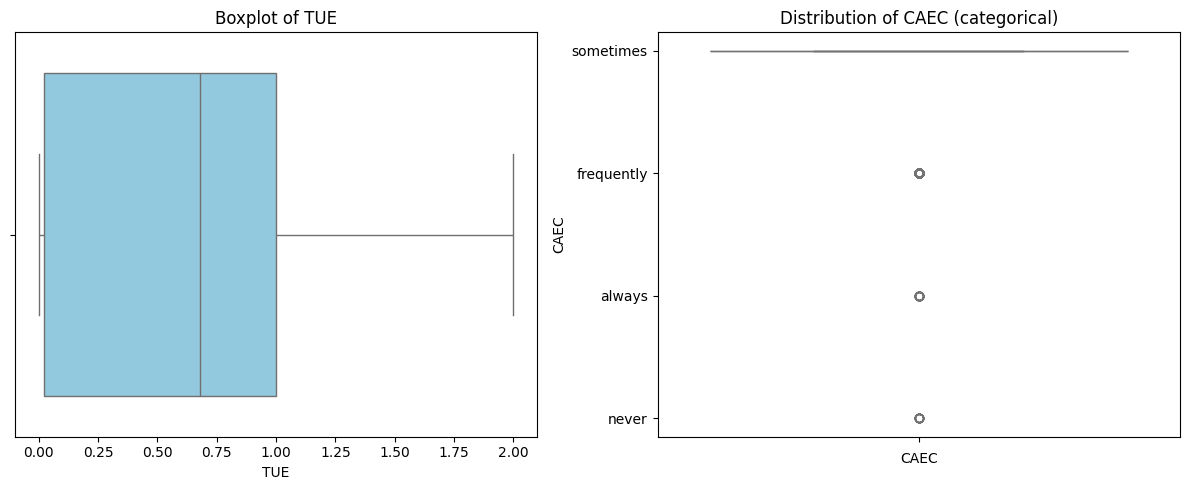

In [23]:
def plot_multiple_boxplots(df, cols):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    for ax, col in zip(axes, cols):
        if df[col].dtype in ['int64', 'float64', 'Int64']:
            sns.boxplot(x=df[col], ax=ax, color='skyblue')
            ax.set_title(f"Boxplot of {col}")
        else:
            sns.boxplot(y=df[col], ax=ax, color='lightgreen')
            ax.set_title(f"Distribution of {col} (categorical)")

        ax.set_xlabel(col)

    plt.tight_layout()
    plt.show()

# Gunakan fungsi
plot_multiple_boxplots(df, ['TUE', 'CAEC'])

Melihat hasil boxplot, dapat disimpulkan bahwa pada kolom TUE (Time using technology), tidak terlihat adanya outlier yang signifikan. Sebaran datanya masih berada dalam rentang wajar.

Namun, untuk kolom CAEC (Consumption of food between meals), boxplot menunjukkan adanya outlier. Kategori 'never' pada CAEC memiliki beberapa titik data yang terdeteksi sebagai outlier, yang mungkin menandakan adanya observasi yang tidak biasa untuk kategori tersebut.

In [24]:
print(df['TUE'].mean())

0.6810336967294351


In [25]:
df['TUE'].fillna(df['TUE'].mean(), inplace=True)

Dengan begitu, diputuskan untuk mengisi nilai yang hilang (fill missing value) pada kolom TUE dengan mean (rata-rata) karena ini merupakan tipe data numerik yang distribusinya cenderung kontinu dan tidak memiliki outlier signifikan yang akan memengaruhi rata-rata secara drastis. 

In [26]:
print(df['CAEC'].mode()[0])

sometimes


In [27]:
df['CAEC'].fillna(df['CAEC'].mode()[0], inplace=True)

Sementara itu, kolom CAEC diisi dengan mode (nilai paling sering muncul) karena ini merupakan tipe data kategorikal, di mana mode adalah cara paling tepat untuk mengisi nilai yang hilang tanpa mengubah distribusi frekuensi kategori secara fundamental.

In [28]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

# Exploratory Data Analysis

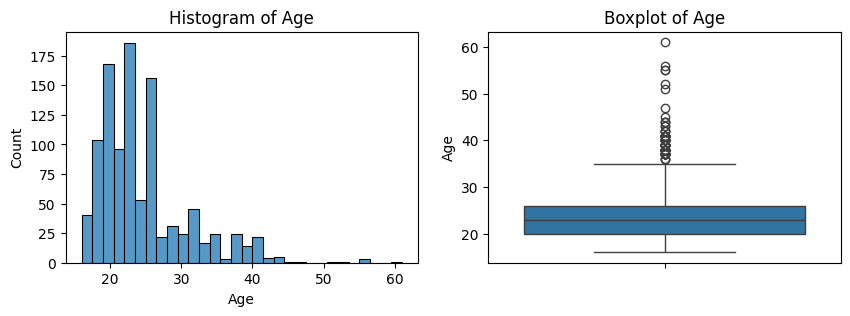

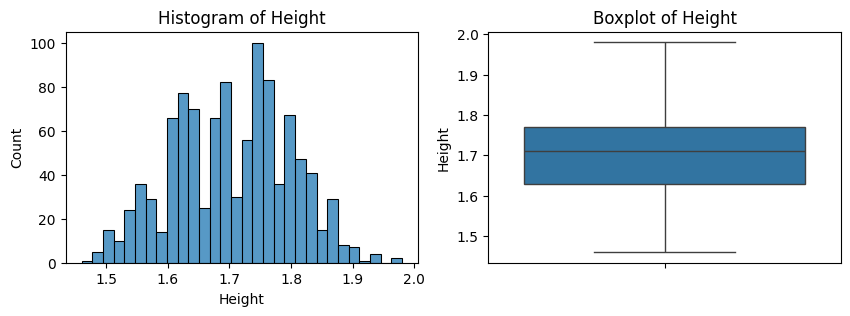

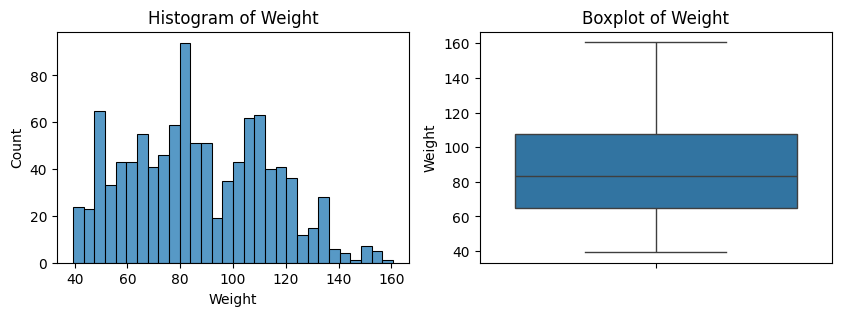

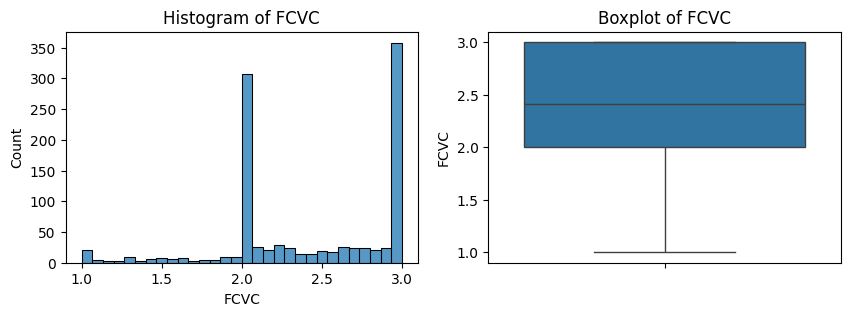

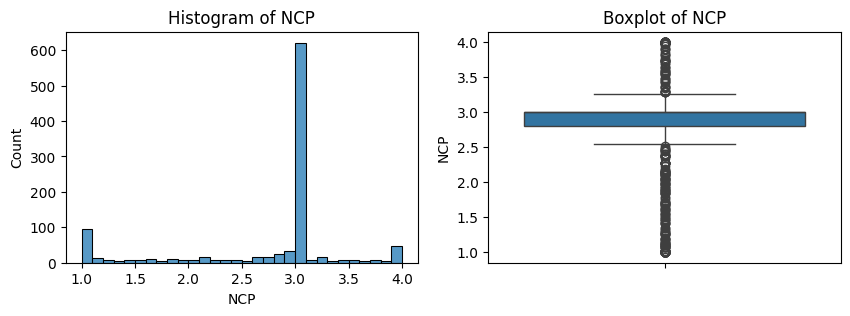

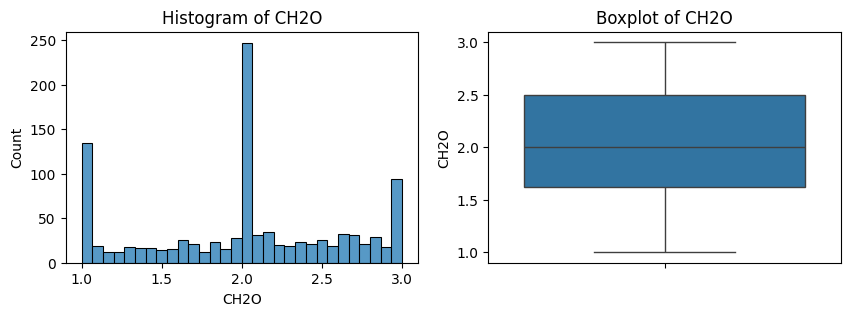

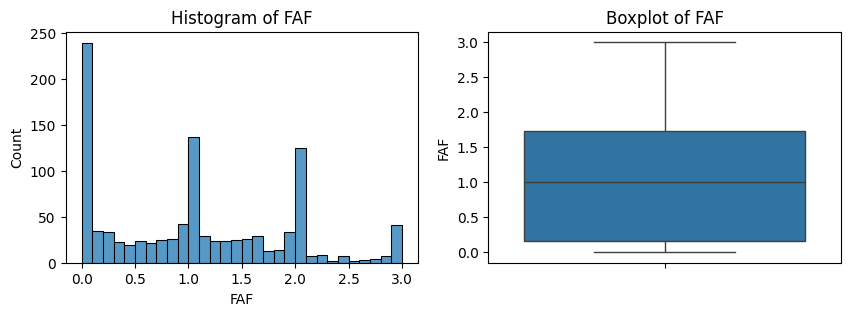

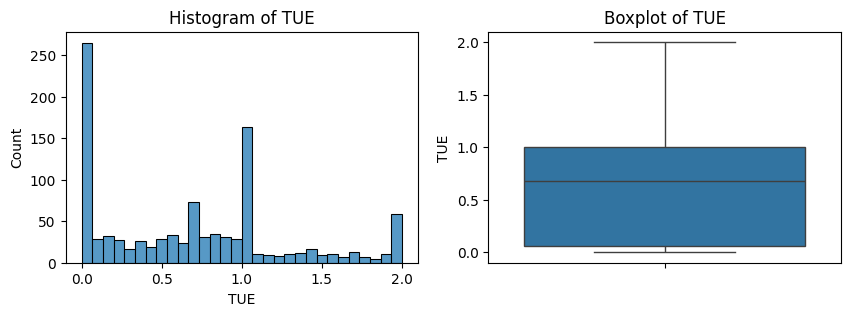

In [29]:
def check_distribution_outliers(df, num_cols):
    for col in num_cols:
        plt.figure(figsize=(10, 3))

        plt.subplot(1, 2, 1)
        sns.histplot(df[col], bins=30)
        plt.title(f'Histogram of {col}')

        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')

        plt.show()
check_distribution_outliers(df, num_cols)

Pada distribusi numerik, teridentifikasi adanya outlier pada kolom 'Age' dan 'NCP'. Namun, perlu dicatat bahwa kolom 'NCP' (Number of Main Meals) akan diperlakukan sebagai variabel ordinal berskala sesuai deskripsi dataset. Oleh karena itu, nilai-nilai yang tampak ekstrem di kolom 'NCP' dianggap valid dalam konteks skalanya dan tidak memerlukan penanganan outlier secara khusus.

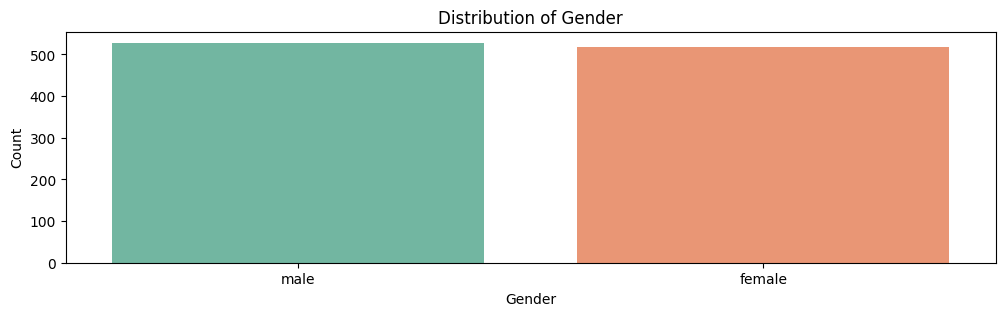

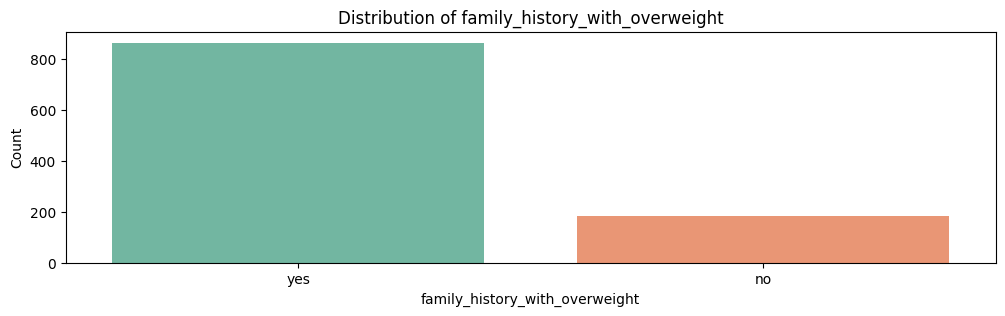

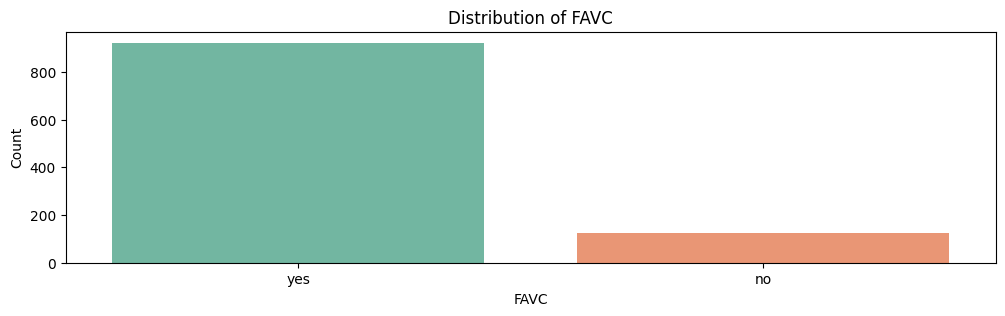

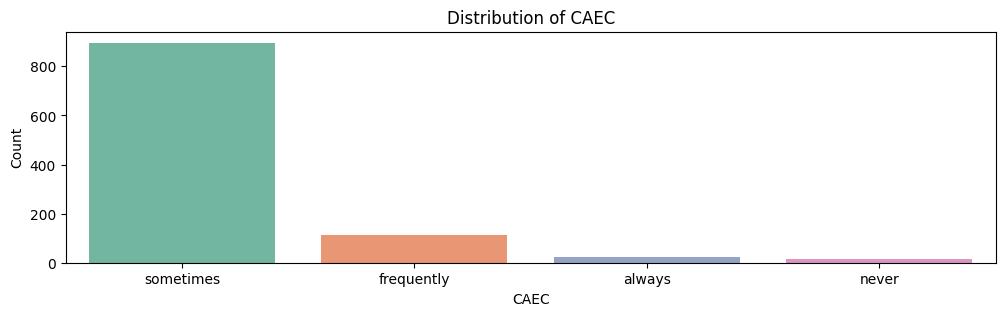

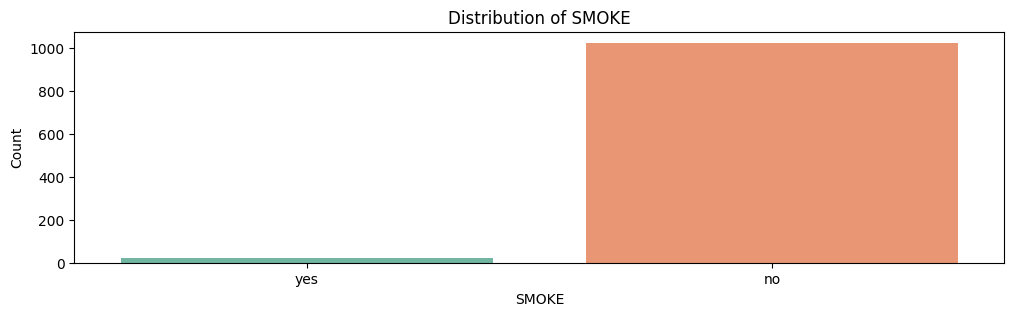

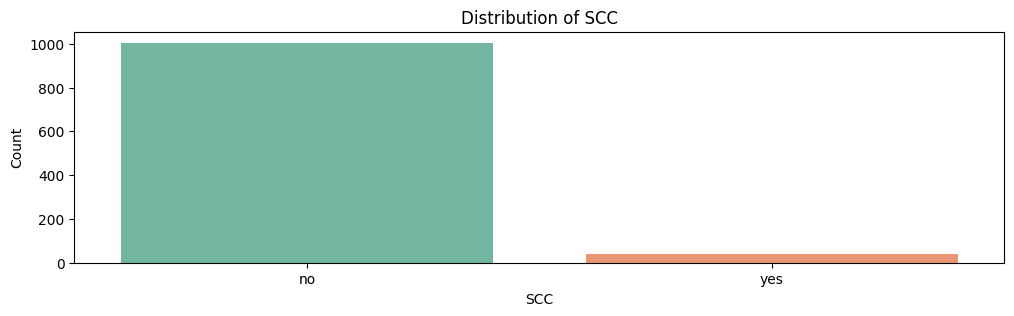

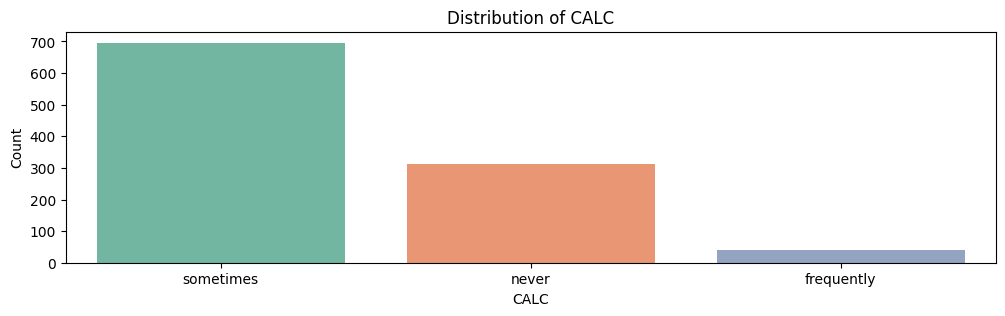

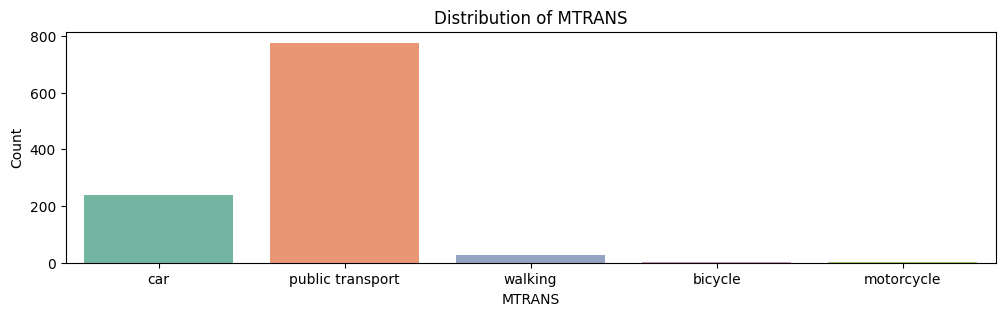

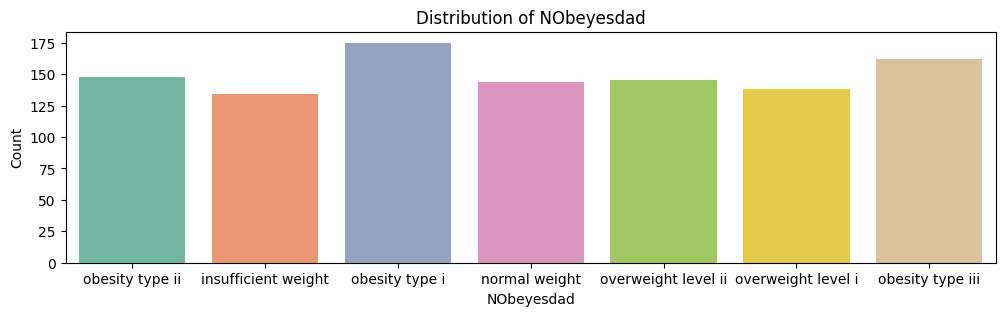

In [30]:
# Plot the distribution of categorical variables
def plot_categorical_distribution(df, cat_cols):
    for col in cat_cols:
        plt.figure(figsize=(12, 3))
        sns.countplot(x=df[col], palette="Set2")
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()

plot_categorical_distribution(df, cat_cols)

Berdasarkan visualisasi variabel kategorikal, dapat disimpulkan beberapa observasi kunci mengenai distribusi dan karakteristik data:

- Gender: Jumlah individu Male dan Female dalam dataset terlihat hampir setara, menunjukkan keseimbangan gender.
- Family History with Overweight (family_history_with_overweight): Mayoritas individu memiliki riwayat keluarga dengan berat badan berlebih (Yes).
- Consumption of High Caloric Food (FAVC): Sebagian besar individu mengonsumsi makanan berkalori tinggi (Yes).
- Consumption of Food between Meals (CAEC): Frekuensi konsumsi makanan di antara jam makan utama paling banyak adalah Sometimes.
- Smoking (SMOKE): Mayoritas individu tidak merokok (No).
- Calorie Consumption Monitoring (SCC): Mayoritas individu tidak memantau konsumsi kalori mereka (No).
- Consumption of Alcohol (CALC): Frekuensi konsumsi alkohol paling banyak adalah Sometimes.
- Transportation Used (MTRANS): Mayoritas individu menggunakan Public Transportation.

In [31]:
for col in cat_cols:
    print(f"Percentage of {col}:")
    percentages = (df[col].value_counts(normalize=True) * 100).round(2).astype(str) + ' %'
    print(percentages.to_string())
    print()

Percentage of Gender:
Gender
male      50.48 %
female    49.52 %

Percentage of family_history_with_overweight:
family_history_with_overweight
yes    82.5 %
no     17.5 %

Percentage of FAVC:
FAVC
yes    88.24 %
no     11.76 %

Percentage of CAEC:
CAEC
sometimes     85.66 %
frequently    10.61 %
always         2.29 %
never          1.43 %

Percentage of SMOKE:
SMOKE
no     97.9 %
yes     2.1 %

Percentage of SCC:
SCC
no     96.08 %
yes     3.92 %

Percentage of CALC:
CALC
sometimes     66.54 %
never         29.73 %
frequently     3.73 %

Percentage of MTRANS:
MTRANS
public transport    74.19 %
car                 22.75 %
walking              2.49 %
bicycle              0.29 %
motorcycle           0.29 %

Percentage of NObeyesdad:
NObeyesdad
obesity type i         16.73 %
obesity type iii       15.49 %
obesity type ii        14.15 %
overweight level ii    13.86 %
normal weight          13.77 %
overweight level i     13.19 %
insufficient weight    12.81 %



Gender:
- Male: 50.48 %
- Female: 49.52 % (Menunjukkan distribusi gender yang hampir setara.)

Family History with Overweight (family_history_with_overweight):
- Yes: 82.5 %
- No: 17.5 % (Mayoritas responden memiliki riwayat keluarga dengan berat badan berlebih.)

Consumption of High Caloric Food (FAVC):
- Yes: 88.24 %
- No: 11.76 % (Sebagian besar responden mengonsumsi makanan berkalori tinggi.)

Consumption of Food between Meals (CAEC):
- Sometimes: 85.66 %
- Frequently: 10.61 %
- Always: 2.29 %
- Never: 1.43 % (Paling banyak responden mengonsumsi makanan ringan di antara jam makan utama kadang-kadang.)

Smoking (SMOKE):
- No: 97.9 %
- Yes: 2.1 % (Sebagian besar responden tidak merokok.)

Calorie Consumption Monitoring (SCC):
- No: 96.08 %
- Yes: 3.92 % (Mayoritas responden tidak memantau konsumsi kalori.)

Consumption of Alcohol (CALC):
- Sometimes: 66.54 %
- Never: 29.73 %
- Frequently: 3.73 % (Konsumsi alkohol paling banyak pada kategori 'sometimes'.)

Transportation Used (MTRANS):
- Public Transportation: 74.19 %
- Car: 22.75 %
- Walking: 2.49 %
- Bicycle: 0.29 %
- Motorcycle: 0.29 % (Transportasi publik adalah moda transportasi dominan.)

Target Variable (NObeyesdad):
- Obesity Type I: 16.73 %
- Obesity Type III: 15.49 %
- Obesity Type II: 14.15 %
- Overweight Level II: 13.86 %
- Normal Weight: 13.77 %
- Overweight Level I: 13.19 %
- Insufficient Weight: 12.81 % (Distribusi kelas target menunjukkan keseimbangan yang relatif baik di antara semua kategori)

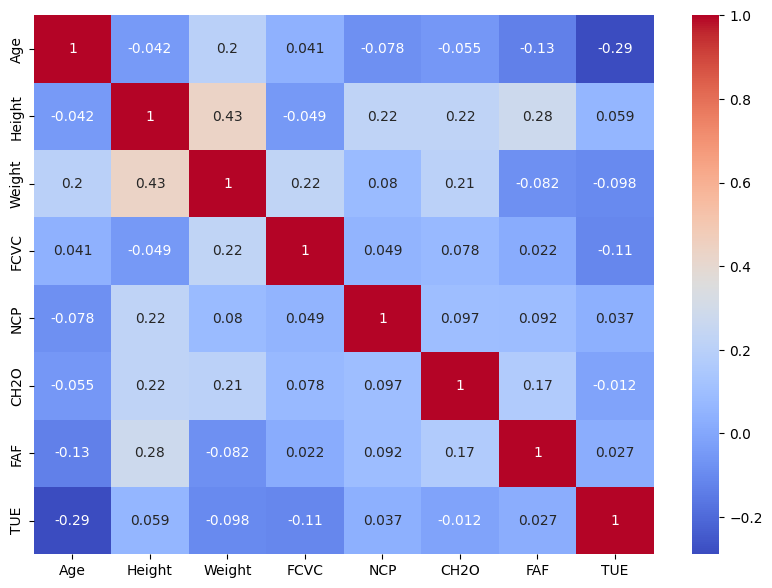

In [32]:
plt.figure(figsize=(10,7))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm');

Matriks korelasi menunjukkan hubungan antar variabel numerik:
- Korelasi Positif Kuat: Terlihat antara Height dan Weight (0.43).
- Korelasi Negatif Kuat: Terlihat antara Age dan TUE (Time Using Technology) (−0.29).
- Korelasi Positif Moderat: Juga ada antara Age dan Weight (0.2), serta FCVC dan Weight (0.22).

Variabel lainnya menunjukkan korelasi yang lemah atau tidak signifikan. Ini memberikan gambaran ringkas tentang bagaimana variabel-variabel ini saling terkait secara linier.

<Axes: xlabel='Gender', ylabel='Weight'>

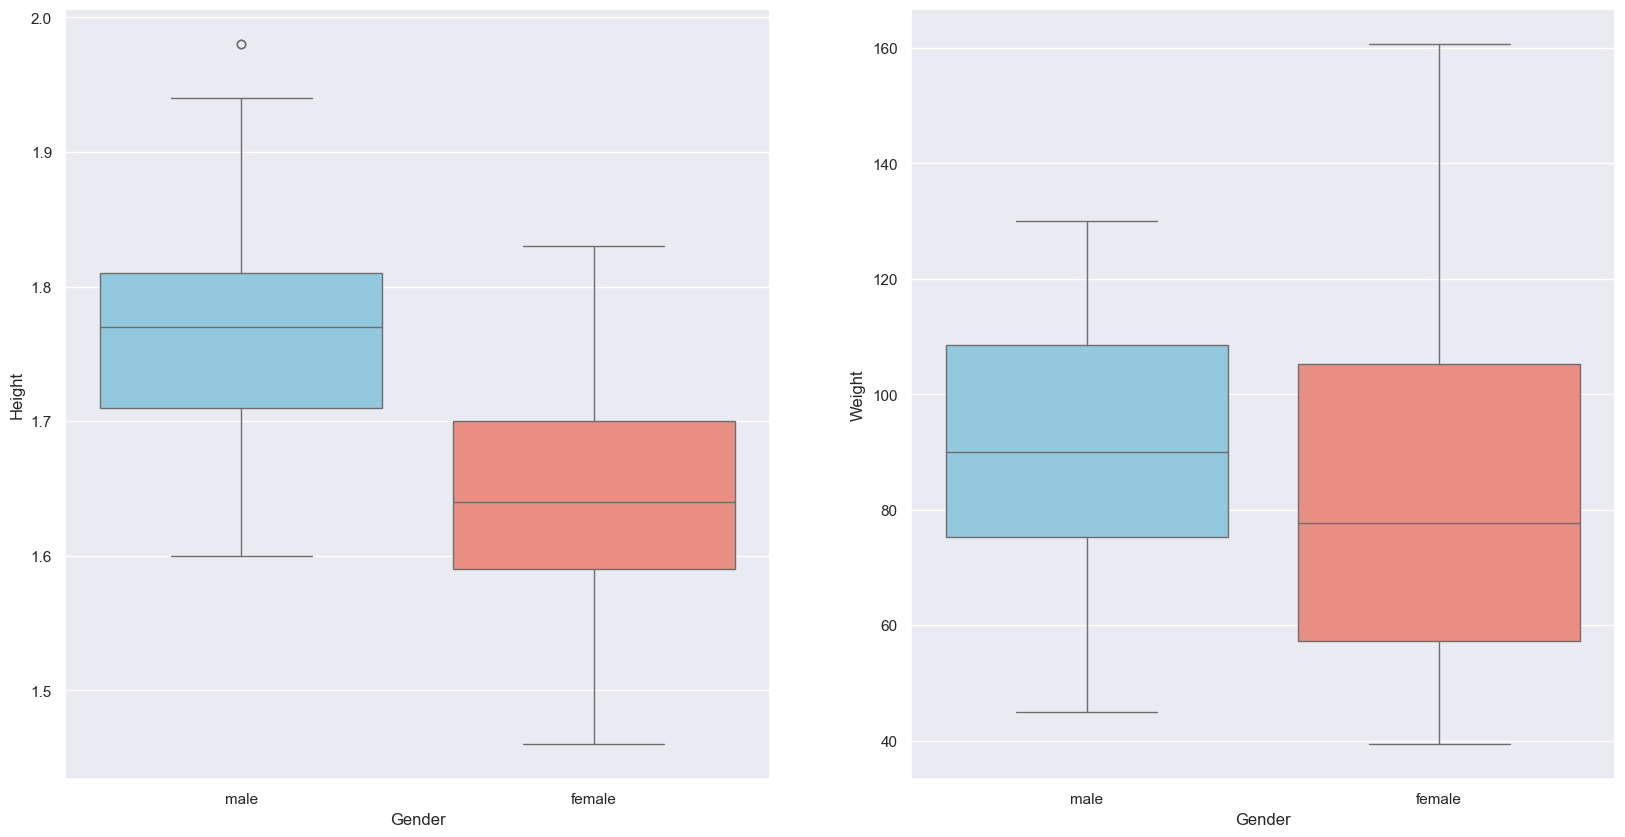

In [34]:
sns.set()
fig = plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
sns.boxplot(x='Gender', y='Height', data=df, palette={'female': 'salmon', 'male': 'skyblue'})
plt.subplot(1, 2, 2)
sns.boxplot(x='Gender', y='Weight', data=df, palette={'female': 'salmon', 'male': 'skyblue'})

Melalui box plot tinggi dan berat badan berdasarkan gender, terlihat jelas bahwa pria (male) cenderung memiliki tinggi dan berat badan yang lebih besar dibandingkan wanita (female). Meskipun ada tumpang tindih dalam distribusi, median pria konsisten lebih tinggi. Selain itu, beberapa outlier teridentifikasi pada pria untuk kedua variabel tinggi dan berat badan, mengindikasikan adanya individu yang jauh di atas rata-rata kelompok mereka.

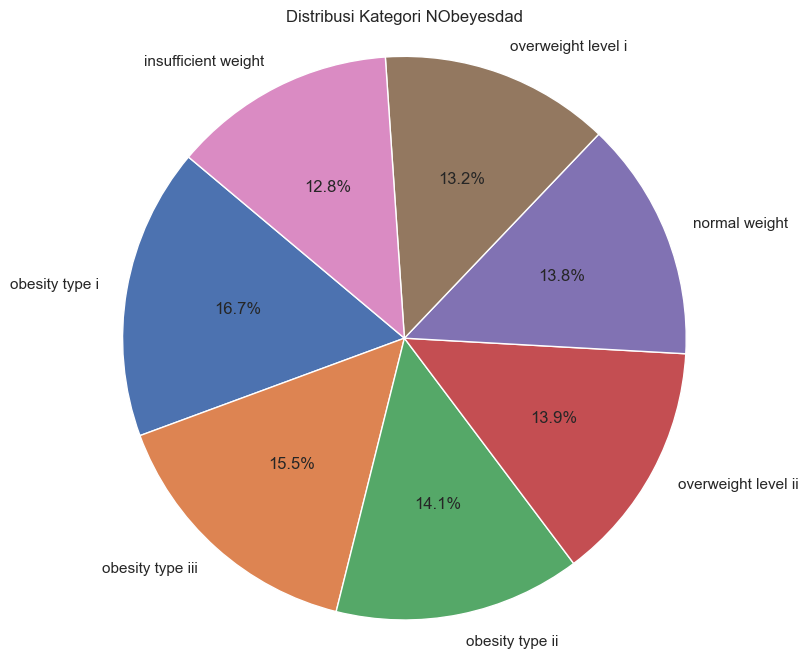

In [35]:
category_counts = df['NObeyesdad'].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Kategori NObeyesdad')
plt.axis('equal')  # Biar pie-nya bulat
plt.show()

Visualisasi ini dengan jelas menunjukkan bahwa distribusi kelas untuk variabel target NObeyesdad relatif seimbang. Setiap kategori memiliki proporsi yang cukup merata, berkisar antara 12.8% hingga 16.7%. Keseimbangan ini menegaskan kembali mengapa Anda memutuskan untuk tidak menggunakan teknik oversampling seperti SMOTE, karena tidak ada masalah ketidakseimbangan kelas yang signifikan yang dapat membiaskan pelatihan model.

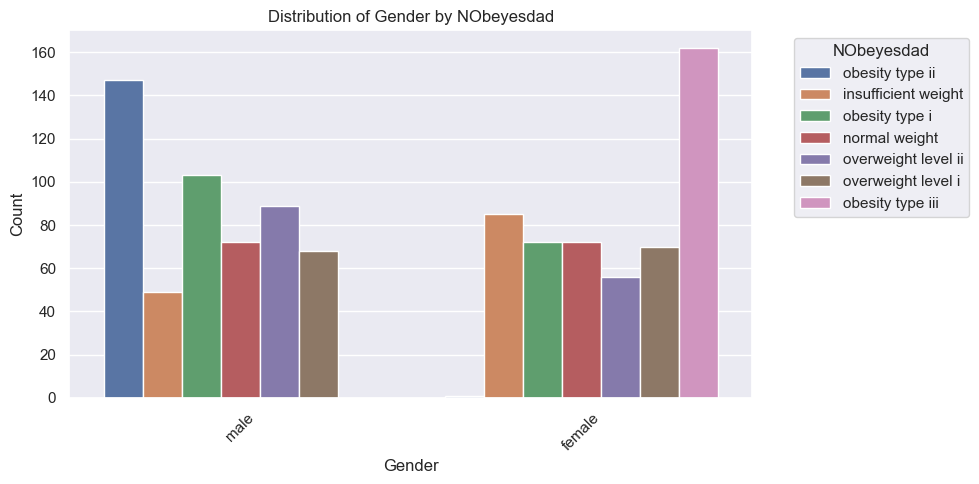

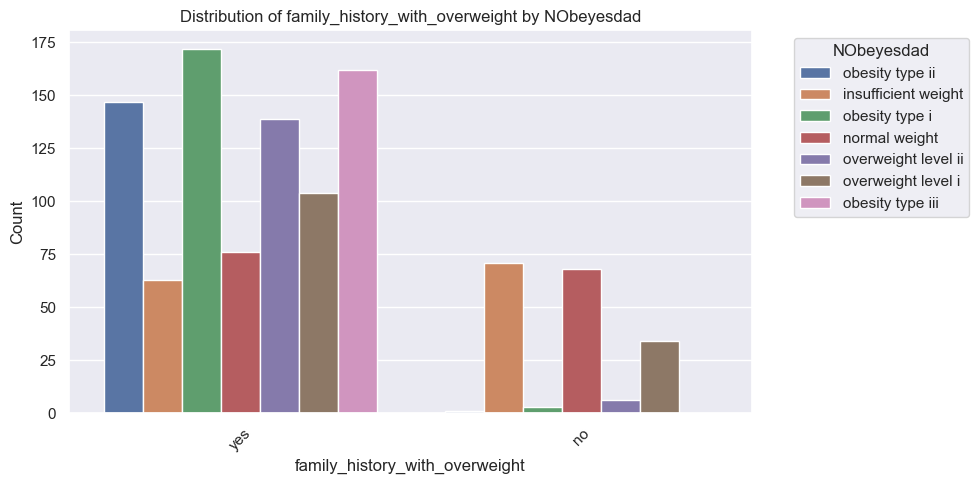

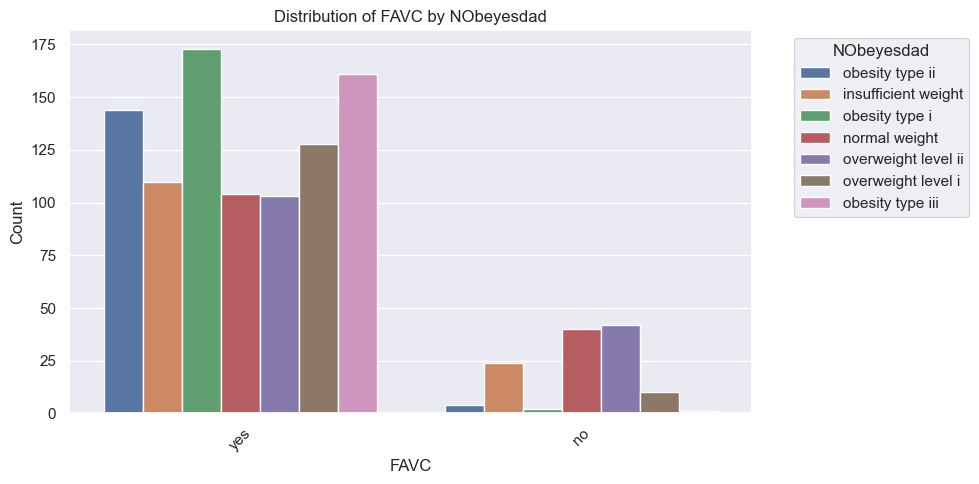

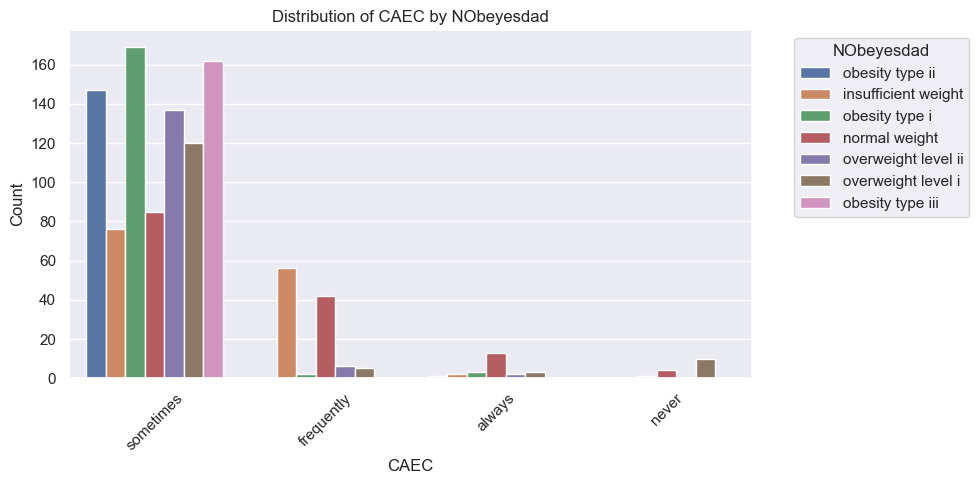

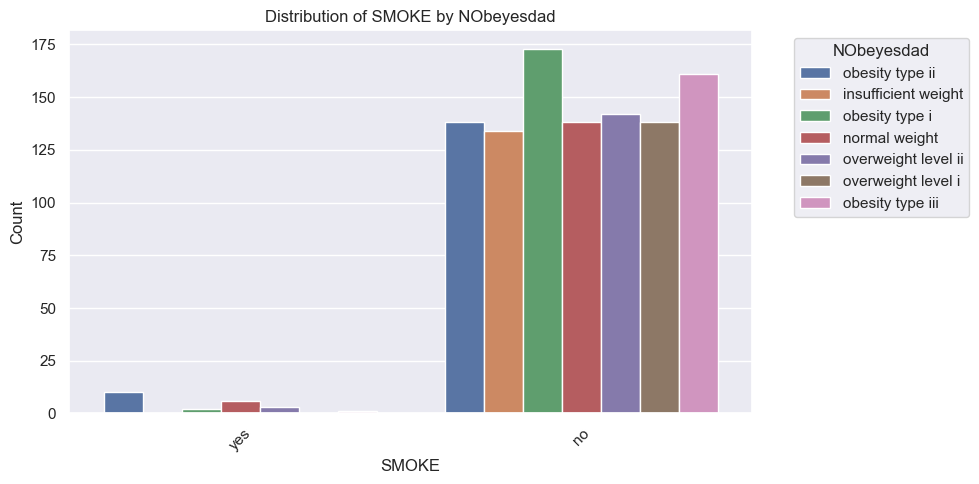

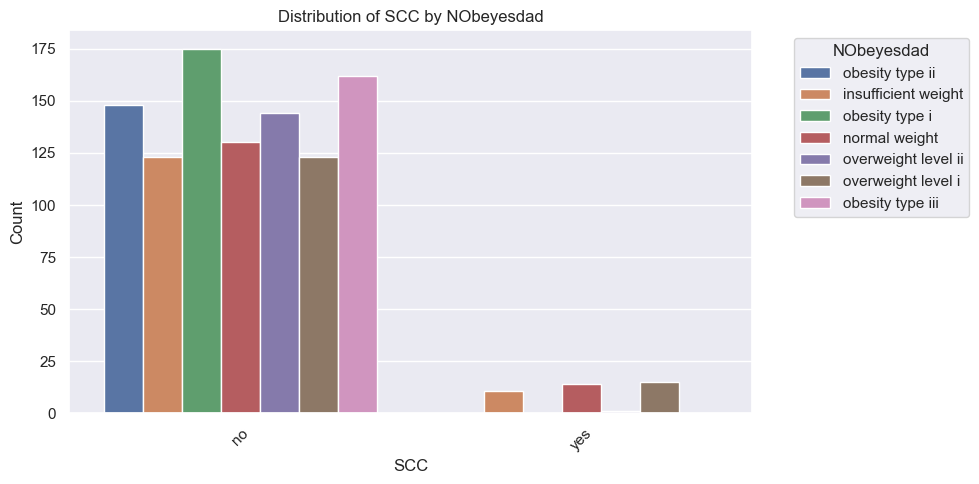

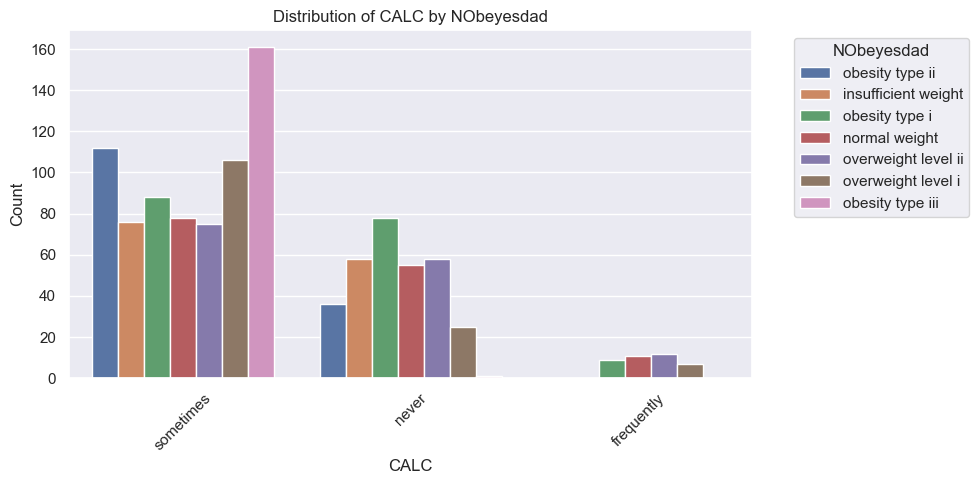

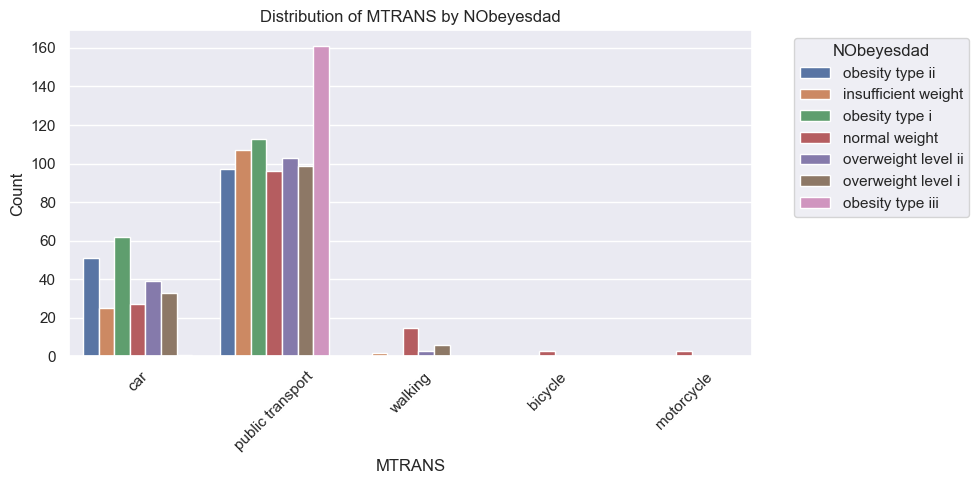

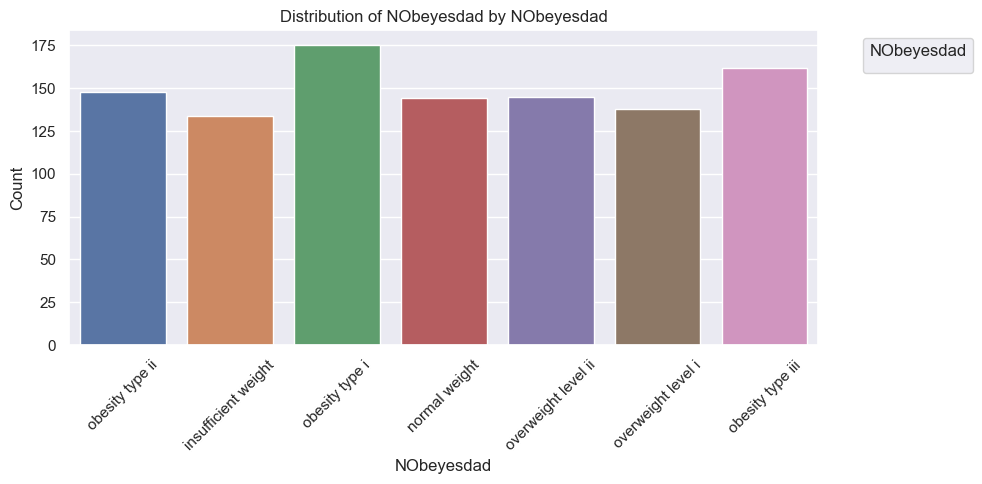

In [36]:
# Plot distribusi untuk tiap kolom kategorikal terhadap NObeyesdad
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, hue='NObeyesdad')
    plt.title(f'Distribution of {col} by NObeyesdad')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='NObeyesdad', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

Dari distribusi setiap kolom kategorikal terhadap NObeyesdad, terlihat bahwa Obesity Type III cukup dominan di antara perempuan dan mereka yang menggunakan transportasi publik. Ini menunjukkan pola awal hubungan antara demografi/gaya hidup tertentu dengan tingkat obesitas tertinggi.

# Preprocessing

## Round

Pada tahap preprocessing ini, tinggi (Height) dikalikan 100 untuk mengonversinya menjadi sentimeter (cm), sesuai dengan pengukuran umum di kehidupan nyata. Setelah itu, nilai-nilai pada kolom Height, Weight, dan Age dibulatkan menjadi satu angka desimal (.round(1)). Proses ini dilakukan untuk menstandardisasi presisi data dan menyiapkan dataset agar lebih konsisten dan optimal untuk analisis selanjutnya.

In [34]:
df['Height'] = df['Height']*100
df['Height'] = df['Height'].round(1)
df['Weight'] = df['Weight'].round(1)
df['Age'] = df['Age'].round(1)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,male,31,187.0,128.9,yes,yes,2.96,3.00,sometimes,yes,1.28,no,0.90,1.875,sometimes,car,obesity type ii
1,female,18,159.0,40.0,yes,yes,2.00,1.00,frequently,no,1.00,no,0.00,2.000,never,public transport,insufficient weight
2,female,44,159.0,77.0,yes,yes,2.00,3.00,sometimes,no,2.81,no,0.00,0.000,sometimes,car,obesity type i
3,male,31,168.0,102.0,yes,yes,2.94,2.14,sometimes,no,1.25,no,1.18,0.778,never,public transport,obesity type ii
4,male,22,174.0,75.0,yes,yes,3.00,3.00,frequently,no,1.00,no,1.00,0.000,never,car,normal weight


In [35]:
ordinal_cols = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

for col in ordinal_cols:
    print(f"🔹 Value counts for {col}:")
    print(df[col].value_counts().sort_index(), "\n")

🔹 Value counts for FCVC:
FCVC
1.00     15
1.01      2
1.03      1
1.04      1
1.06      1
       ... 
2.96      3
2.97      9
2.98      5
2.99      1
3.00    326
Name: count, Length: 160, dtype: int64 

🔹 Value counts for NCP:
NCP
1.00    87
1.02     1
1.05     1
1.07     2
1.08     3
        ..
3.94     1
3.97     1
3.98     1
3.99     6
4.00    37
Name: count, Length: 175, dtype: int64 

🔹 Value counts for CH2O:
CH2O
1.00    106
1.01      6
1.02      7
1.03      4
1.04      2
       ... 
2.96      4
2.97      2
2.98      5
2.99      3
3.00     77
Name: count, Length: 194, dtype: int64 

🔹 Value counts for FAF:
FAF
0.00    195
0.01     10
0.02      5
0.03      7
0.04      5
       ... 
2.88      1
2.89      3
2.93      1
2.97      1
3.00     39
Name: count, Length: 226, dtype: int64 

🔹 Value counts for TUE:
TUE
0.000    241
0.001      2
0.002      2
0.003      2
0.004      1
        ... 
1.970      1
1.971      1
1.973      1
1.984      1
2.000     51
Name: count, Length: 471, dtype:

Mengidentifikasi kolom FCVC, NCP, CH2O, FAF, dan TUE sebagai kolom ordinal. Ini berarti nilai-nilai dalam kolom tersebut merepresentasikan kategori yang memiliki urutan atau skala, seperti yang dijelaskan dalam deskripsi dataset.

Penting untuk dicatat bahwa setiap kolom ordinal ini memiliki rentang nilai valid yang spesifik sesuai dengan skalanya:

FCVC: Skala 1 hingga 3.
NCP: Skala 1 hingga 4.
CH2O: Skala 1 hingga 3.
FAF: Skala 0 hingga 3.
TUE: Skala 0 hingga 3.

Pemeriksaan awal menunjukkan bahwa semua nilai yang ada dalam kolom-kolom ini sudah berada dalam rentang yang diharapkan, memastikan integritas data ordinal sebelum melanjutkan ke tahap analisis atau pemodelan lebih lanjut.

In [36]:
# Kolom ordinal dan rentang nilai validnya
ordinal_info = {
    'FCVC': (1, 3),   # Frekuensi konsumsi sayur
    'NCP': (1, 4),    # Jumlah makanan utama
    'CH2O': (1, 3),   # Asupan air harian
    'FAF': (0, 3),    # Frekuensi aktivitas fisik
    'TUE': (0, 3)     # Waktu penggunaan teknologi
}

for col, (min_val, max_val) in ordinal_info.items():
    df[col] = pd.to_numeric(df[col], errors='coerce').round().astype('Int64')  # Aman dengan dukungan NaN
    values = df[col].dropna()
    print(f"{col}: min={values.min()}, max={values.max()}, dtype={df[col].dtype}")
    print("Unique values:", values.unique())

    # Validasi range
    if values.min() < min_val or values.max() > max_val:
        print(f"⚠️ Warning: '{col}' contains values outside expected range [{min_val}–{max_val}]\n")
    else:
        print("✅ Values within expected range.\n")

FCVC: min=1, max=3, dtype=Int64
Unique values: <IntegerArray>
[3, 2, 1]
Length: 3, dtype: Int64
✅ Values within expected range.

NCP: min=1, max=4, dtype=Int64
Unique values: <IntegerArray>
[3, 1, 2, 4]
Length: 4, dtype: Int64
✅ Values within expected range.

CH2O: min=1, max=3, dtype=Int64
Unique values: <IntegerArray>
[1, 3, 2]
Length: 3, dtype: Int64
✅ Values within expected range.

FAF: min=0, max=3, dtype=Int64
Unique values: <IntegerArray>
[1, 0, 2, 3]
Length: 4, dtype: Int64
✅ Values within expected range.

TUE: min=0, max=2, dtype=Int64
Unique values: <IntegerArray>
[2, 0, 1]
Length: 3, dtype: Int64
✅ Values within expected range.



In [37]:
# Kolom ordinal berdasar domain knowledge
ordinal_cols = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

num_cols = []
cat_cols = []

for col in df.columns:
    if col in ordinal_cols:
        cat_cols.append(col)  # Anggap ordinal sebagai kategorikal
    elif df[col].dtype == 'object':
        cat_cols.append(col)
    elif "int" in str(df[col].dtype) or "float" in str(df[col].dtype):
        num_cols.append(col)

print(f"Numerical Columns : {num_cols}\n")
print(f"Categorical Columns : {cat_cols}\n")

Numerical Columns : ['Age', 'Height', 'Weight']

Categorical Columns : ['Gender', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']



In [38]:
for col in ordinal_cols:
    print(f"\n📊 {col} value counts (sorted):")
    print(df[col].value_counts().sort_index())

ordinal_cols = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


📊 FCVC value counts (sorted):
FCVC
1     51
2    493
3    502
Name: count, dtype: Int64

📊 NCP value counts (sorted):
NCP
1    128
2     93
3    751
4     74
Name: count, dtype: Int64

📊 CH2O value counts (sorted):
CH2O
1    235
2    557
3    254
Name: count, dtype: Int64

📊 FAF value counts (sorted):
FAF
0    352
1    373
2    264
3     57
Name: count, dtype: Int64

📊 TUE value counts (sorted):
TUE
0    427
1    504
2    115
Name: count, dtype: Int64


## Handling Outliers

In [39]:
df['Age'].describe()

,Age
count,1046.000000
mean,24.428298
std,6.412318
min,16.000000
25%,20.000000
50%,23.000000
75%,26.000000
max,61.000000


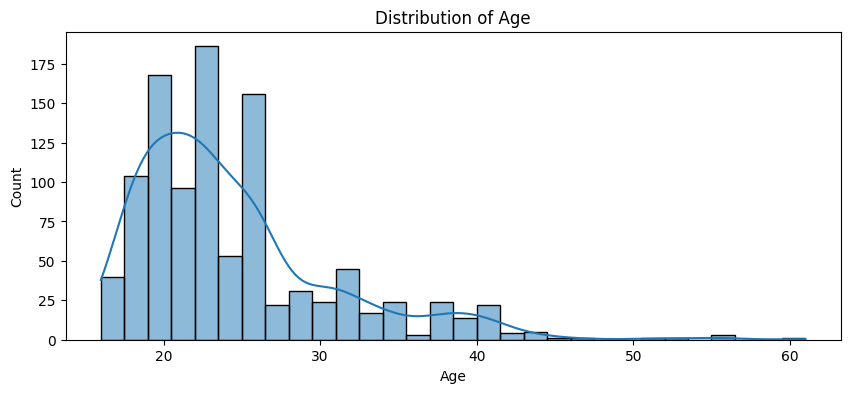

In [40]:
plt.figure(figsize=(10,4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Distribution of Age")
plt.show()

In [41]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
print(f"Outlier Count: {len(outliers)}")
print(outliers['Age'].sort_values())

Outlier Count: 80
437    36
440    36
826    36
86     37
297    37
       ..
212    52
487    55
886    55
7      56
223    61
Name: Age, Length: 80, dtype: int64


In [42]:
df.shape

(1046, 17)

Ketika melakukan Eksplorasi Data Awal (EDA) menggunakan boxplot untuk kolom Age, memang ditemukan adanya outlier. Meskipun menerapkan metode IQR (Interquartile Range) untuk mengidentifikasi outlier pada kolom numerik, saya memutuskan untuk tidak menghapus outlier pada kolom usia ini.

Keputusan ini didasari oleh pertimbangan bahwa nilai-nilai usia yang teridentifikasi sebagai outlier masih berada dalam batas yang wajar, yakni sekitar 60-an tahun. Selain itu, outlier ini bisa jadi merupakan representasi populasi normal yang mengalami obesitas, baik itu pada usia muda maupun lansia. Menghapus data ini berisiko menghilangkan informasi berharga dan mengurangi representasi sebenarnya dari karakteristik populasi dalam dataset. Oleh karena itu, data outlier pada kolom Age dipertahankan untuk analisis lebih lanjut.

## Encode

Encoding adalah langkah penting dalam preprocessing data untuk mengubah variabel kategorikal (teks) menjadi format numerik. Tanpa ini, algoritma machine learning tidak bisa memproses data tersebut. Pemilihan metode encoding yang tepat sangat vital karena berdampak besar pada kinerja model.

In [43]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,male,31,187.0,128.9,yes,yes,3,3,sometimes,yes,1,no,1,2,sometimes,car,obesity type ii
1,female,18,159.0,40.0,yes,yes,2,1,frequently,no,1,no,0,2,never,public transport,insufficient weight
2,female,44,159.0,77.0,yes,yes,2,3,sometimes,no,3,no,0,0,sometimes,car,obesity type i
3,male,31,168.0,102.0,yes,yes,3,2,sometimes,no,1,no,1,1,never,public transport,obesity type ii
4,male,22,174.0,75.0,yes,yes,3,3,frequently,no,1,no,1,0,never,car,normal weight


### Encode Target Features

Langkah pertama dalam proses encoding adalah mengubah fitur target (misalnya, status berat badan atau tingkat obesitas) menjadi representasi numerik. Kita akan melakukan ini dengan pemetaan (mapping) secara ordinal, di mana setiap kategori diberi nilai numerik yang berurutan.

Pemetaan akan dimulai dari nilai 0 untuk kategori terendah, yaitu 'Insufficient Weight', dan berlanjut secara bertahap hingga nilai 6 untuk kategori tertinggi, yaitu 'Obesity Type III'. 

In [44]:
obesity_map = {
    'insufficient weight': 0,
    'normal weight': 1,
    'overweight level i': 2,
    'overweight level ii': 3,
    'obesity type i': 4,
    'obesity type ii': 5,
    'obesity type iii': 6
}

df['NObeyesdad'] = df['NObeyesdad'].map(obesity_map)

In [45]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,male,31,187.0,128.9,yes,yes,3,3,sometimes,yes,1,no,1,2,sometimes,car,5
1,female,18,159.0,40.0,yes,yes,2,1,frequently,no,1,no,0,2,never,public transport,0
2,female,44,159.0,77.0,yes,yes,2,3,sometimes,no,3,no,0,0,sometimes,car,4
3,male,31,168.0,102.0,yes,yes,3,2,sometimes,no,1,no,1,1,never,public transport,5
4,male,22,174.0,75.0,yes,yes,3,3,frequently,no,1,no,1,0,never,car,1


# Features Separating

Setelah variabel target NObeyesdad berhasil di-encode, langkah krusial berikutnya adalah memisahkan fitur-fitur input dari variabel target itu sendiri.

Dalam kasus ini, NObeyesdad adalah variabel yang merepresentasikan tingkat obesitas, yang akan menjadi target prediksi (Y) kita. Sementara itu, semua kolom lain yang berisi informasi mengenai karakteristik individu (seperti usia, tinggi, kebiasaan makan, dll.) akan menjadi fitur (X) yang akan digunakan sebagai masukan untuk model.

In [46]:
X = df.drop(["NObeyesdad"], axis=1)
y = df["NObeyesdad"]

## Pipeline



Saya menggunakan Pipeline dan ColumnTransformer untuk preprocessing data. Ini memisahkan kolom menjadi nominal, biner, ordinal, dan numerik, lalu masing-masing diproses dengan transformasi spesifik (seperti OneHotEncoder untuk nominal, OrdinalEncoder untuk biner, dan StandardScaler untuk ordinal/numerik).

Kelebihan Penggunaan Pipeline
Penggunaan pipeline seperti ini sangat menguntungkan karena:

- Organisasi: Menjaga semua langkah preprocessing tetap rapi dan terstruktur.
- Reproduksibilitas: Memastikan setiap kali model dijalankan, preprocessing dilakukan dengan cara yang sama persis.
- Mencegah Data Leakage: Menerapkan transformasi (misalnya scaling) secara terpisah pada setiap fold validasi silang, mencegah "kebocoran" informasi dari data validasi ke data pelatihan.
- Penyederhanaan Kode: Mengurangi jumlah kode berulang dan membuat alur kerja lebih ringkas.

In [47]:
# Define your categorical columns (already done, but reiterating)
nominal_cols = ['CAEC', 'CALC', 'MTRANS']
binary_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.difference(ordinal_cols + binary_cols + nominal_cols).tolist()

# ---------------------
# 3. Transformer per grup fitur
# ---------------------
ordinal_pipeline = Pipeline([
    ('round', 'passthrough'),  # Sudah di-round di luar
    ('scale', StandardScaler())
])

binary_pipeline = Pipeline([
    ('ordinal_enc', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

nominal_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_pipeline = Pipeline([
    ('scale', StandardScaler())
])

# Gabungkan semua dalam ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('ord', ordinal_pipeline, ordinal_cols),
    ('bin', binary_pipeline, binary_cols),
    ('nom', nominal_pipeline, nominal_cols),
    ('num', numeric_pipeline, numeric_cols)
])

# Splitting Data

Setelah data distandarisasi, saya membagi dataset menjadi dua bagian: 80% untuk data pelatihan (training) dan 20% untuk data pengujian (testing) menggunakan fungsi *train_test_split*

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

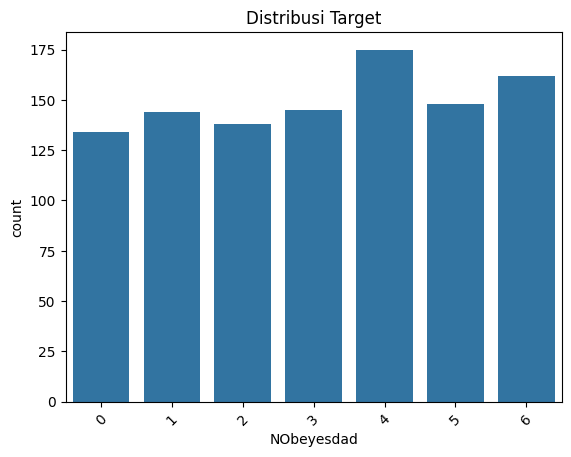

In [49]:
sns.countplot(x='NObeyesdad', data=df)
plt.xticks(rotation=45)
plt.title('Distribusi Target')
plt.show()

Dari grafik "Distribusi Target", terlihat jelas bahwa variabel NObeyesdad memiliki distribusi yang relatif seimbang di semua kategori (0-6). Oleh karena itu, tidak perlu menggunakan SMOTE atau teknik oversampling lainnya, karena tidak ada masalah ketidakseimbangan kelas yang signifikan.

# Modelling

Untuk proyek ini, saya memilih dua algoritma ensemble yang powerful: Random Forest dan XGBoost. Keduanya sangat cocok untuk menangani multiclass classification dan dikenal karena performanya yang kuat.

Modelling akan dilakukan sepenuhnya dalam sebuah Pipeline, yang tidak hanya mencakup langkah preprocessing data yang telah dibahas sebelumnya, tetapi juga algoritma model itu sendiri. Selain itu, hyperparameter tuning akan langsung diintegrasikan ke dalam pipeline ini untuk menemukan kombinasi parameter terbaik yang menghasilkan performa paling optimal dari model.

Tujuan dan Manfaat untuk Deployment
Pendekatan ini, terutama penggunaan pipeline yang terintegrasi dengan hyperparameter tuning, memiliki manfaat signifikan yang memudahkan proses deployment model:

- Konsistensi dan Reproduksibilitas: Seluruh alur pra-preprocessing dan pelatihan model dikemas dalam satu objek pipeline. Ini memastikan bahwa saat model di-deploy, data baru akan diproses dengan urutan transformasi yang sama persis seperti saat model dilatih, menghindari data leakage dan memastikan konsistensi prediksi.
- Penyederhanaan Deployment: Daripada harus menyimpan dan mengelola berbagai objek transformer dan model secara terpisah, Anda hanya perlu menyimpan satu objek pipeline yang telah terlatih. Saat di-deploy, Anda hanya perlu memuat satu objek ini untuk memproses data input dan mendapatkan prediksi. Ini sangat menyederhanakan kode deployment dan mengurangi potensi kesalahan.
- Manajemen Dependensi yang Lebih Baik: Pipeline mengelola urutan eksekusi langkah-langkah, sehingga Anda tidak perlu secara manual mengatur dependensi antar tahap pra-preprocessing dan model.
- Efisiensi Sumber Daya: Proses hyperparameter tuning yang terintegrasi dalam pipeline memungkinkan pencarian parameter optimal secara sistematis, yang dapat menghasilkan model yang lebih efisien dan akurat di lingkungan produksi.

Singkatnya, penggunaan pipeline dan integrasi hyperparameter tuning menciptakan artefak model yang mandiri dan robust, yang sangat ideal untuk proses deployment yang mulus dan dapat diandalkan.

In [50]:
pipeline_rf = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipeline_xgb = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

In [51]:
rf_param_grid = {
    'classifier__criterion': ['gini', 'entropy', 'log_loss'],
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, 30]
}

xgb_param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 4, 5],
    'classifier__learning_rate': [0.05, 0.1, 0.2]
}

grid_rf = GridSearchCV(pipeline_rf, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_xgb = GridSearchCV(pipeline_xgb, xgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [52]:
target_names = [
    'Insufficient Weight',
    'Normal Weight',
    'Overweight Level I',
    'Overweight Level II',
    'Obesity Type I',
    'Obesity Type II',
    'Obesity Type III'
]

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best RF Params: {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__n_estimators': 200}
                     precision    recall  f1-score   support

Insufficient Weight       0.97      1.00      0.98        28
      Normal Weight       0.87      0.95      0.91        21
 Overweight Level I       0.96      0.84      0.90        31
Overweight Level II       0.91      0.94      0.93        34
     Obesity Type I       0.95      0.95      0.95        39
    Obesity Type II       1.00      1.00      1.00        28
   Obesity Type III       1.00      1.00      1.00        29

           accuracy                           0.95       210
          macro avg       0.95      0.95      0.95       210
       weighted avg       0.95      0.95      0.95       210



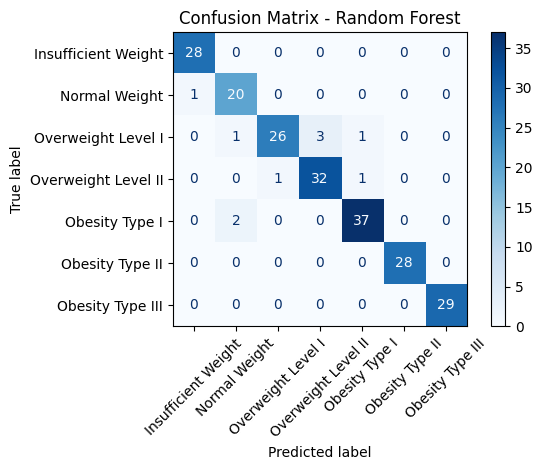

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best XGB Params: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__n_estimators': 300}
                     precision    recall  f1-score   support

Insufficient Weight       1.00      1.00      1.00        28
      Normal Weight       1.00      0.95      0.98        21
 Overweight Level I       0.91      0.94      0.92        31
Overweight Level II       0.94      0.94      0.94        34
     Obesity Type I       1.00      1.00      1.00        39
    Obesity Type II       1.00      1.00      1.00        28
   Obesity Type III       1.00      1.00      1.00        29

           accuracy                           0.98       210
          macro avg       0.98      0.98      0.98       210
       weighted avg       0.98      0.98      0.98       210



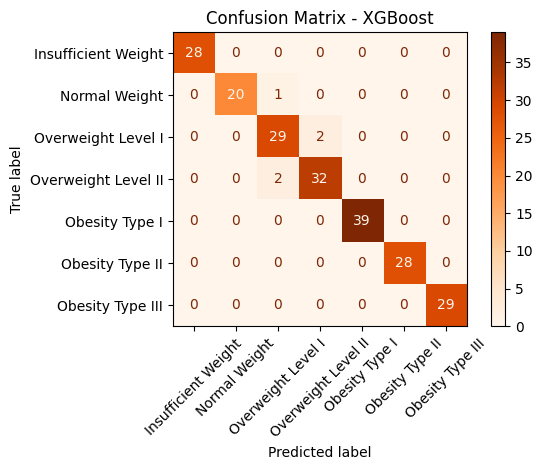

In [53]:
# Random Forest
grid_rf.fit(X_train, y_train)
y_pred_rf = grid_rf.predict(X_test)
print("Best RF Params:", grid_rf.best_params_)
print(classification_report(y_test, y_pred_rf, target_names=target_names))

# Confusion Matrix - RF
ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred_rf),
    display_labels=target_names
).plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.show()


# XGBoost
grid_xgb.fit(X_train, y_train)
y_pred_xgb = grid_xgb.predict(X_test)
print("Best XGB Params:", grid_xgb.best_params_)
print(classification_report(y_test, y_pred_xgb, target_names=target_names))

# Confusion Matrix - XGB
ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred_xgb),
    display_labels=target_names
).plot(cmap="Oranges", xticks_rotation=45)
plt.title("Confusion Matrix - XGBoost")
plt.tight_layout()
plt.show()

**RANDOM FOREST CLASSIFICATION**

Model Random Forest, setelah hyperparameter tuning (criterion='entropy', max_depth=10, n_estimators=200), menunjukkan performa sangat baik untuk multiclass classification.

- Akurasi Keseluruhan: 95%.
- Performa per Kelas:
    - Insufficient Weight, Obesity Type II, dan Obesity Type III mencapai performa hampir sempurna (F1-score 0.98-1.00).
    - Kelas lain seperti Normal Weight (F1 0.91), Overweight Level I (F1 0.90), Overweight Level II (F1 0.93), dan Obesity Type I (F1 0.95) juga menunjukkan hasil sangat kuat.


Berdasarkan Confusion Matrix yang disajikan untuk model Random Forest, mari kita bedah performa klasifikasi per kategori, dengan mengadaptasi konsep True Positives (TP), False Positives (FP), dan False Negatives (FN) untuk setiap kelas dalam skenario multiclass:

Kelas "Insufficient Weight":
- True Positive (TP): 28 -- Model dengan benar mengidentifikasi 28 individu yang memang memiliki berat badan Insufficient Weight. Ini adalah kasus prediksi yang tepat.
- False Positive (FP): 0 -- Tidak ada individu dari kelas lain yang salah diprediksi sebagai Insufficient Weight. Model sangat presisi untuk kelas ini.
- False Negative (FN): 0 -- Tidak ada individu yang sebenarnya Insufficient Weight tetapi salah diprediksi sebagai kelas lain. Model sangat sensitif dan mampu mendeteksi semua kasus Insufficient Weight.

Kelas "Normal Weight":
- True Positive (TP): 20 -- Model dengan benar mengidentifikasi 20 individu yang memang memiliki berat badan Normal Weight.
- False Positive (FP): 1 -- Ada 1 individu (dari Overweight Level I) yang sebenarnya bukan Normal Weight tetapi salah diprediksi sebagai Normal Weight.
- False Negative (FN): 1 -- Ada 1 individu yang sebenarnya Normal Weight tetapi salah diprediksi sebagai Insufficient Weight.

Kelas "Overweight Level I":
- True Positive (TP): 26 -- Model dengan benar mengidentifikasi 26 individu yang memang memiliki tingkat obesitas Overweight Level I.
- False Positive (FP): 0 -- Tidak ada individu dari kelas lain yang salah diprediksi sebagai Overweight Level I.
- False Negative (FN): 4 (1+3) -- Ada 4 individu yang sebenarnya Overweight Level I tetapi salah diprediksi: 1 sebagai Normal Weight, 3 sebagai Overweight Level II, dan 1 sebagai Obesity Type I.

Kelas "Overweight Level II":
- True Positive (TP): 32 -- Model dengan benar mengidentifikasi 32 individu yang memang memiliki tingkat obesitas Overweight Level II.
- False Positive (FP): 3 -- Ada 3 individu (dari Overweight Level I) yang sebenarnya bukan Overweight Level II tetapi salah diprediksi sebagai Overweight Level II.
- False Negative (FN): 1 -- Ada 1 individu yang sebenarnya Overweight Level II tetapi salah diprediksi sebagai Obesity Type I.

Kelas "Obesity Type I":
- True Positive (TP): 37 -- Model dengan benar mengidentifikasi 37 individu yang memang memiliki tingkat obesitas Obesity Type I.
- False Positive (FP): 1 -- Ada 1 individu (dari Overweight Level I) yang sebenarnya bukan Obesity Type I tetapi salah diprediksi sebagai Obesity Type I.
- False Negative (FN): 2 -- Ada 2 individu yang sebenarnya Obesity Type I tetapi salah diprediksi sebagai Normal Weight.

Kelas "Obesity Type II":
- True Positive (TP): 28 -- Model dengan benar mengidentifikasi 28 individu yang memang memiliki tingkat obesitas Obesity Type II.
- False Positive (FP): 0 -- Tidak ada individu dari kelas lain yang salah diprediksi sebagai Obesity Type II.
- False Negative (FN): 0 -- Tidak ada individu yang sebenarnya Obesity Type II tetapi salah diprediksi sebagai kelas lain.

Kelas "Obesity Type III":
- True Positive (TP): 29 -- Model dengan benar mengidentifikasi 29 individu yang memang memiliki tingkat obesitas Obesity Type III.
- False Positive (FP): 0 -- Tidak ada individu dari kelas lain yang salah diprediksi sebagai Obesity Type III.
- False Negative (FN): 0 -- Tidak ada individu yang sebenarnya Obesity Type III tetapi salah diprediksi sebagai kelas lain.

Dalam multiclass classification, ketika kita menganalisis satu kelas (misalnya "Normal Weight"), "Negatif" berarti "bukan Normal Weight" (yaitu bisa Insufficient Weight, Overweight Level I, Obesity Type I, dll.). Menghitung TN untuk satu kelas berarti menjumlahkan semua instance dari semua kelas lain yang diprediksi dengan benar sebagai bukan kelas tersebut. 

Secara keseluruhan, model Random Forest dengan hyperparameter yang telah di-tuning menunjukkan kemampuan klasifikasi yang sangat kuat untuk memprediksi tingkat obesitas, dengan akurasi dan metrik performa per kelas yang konsisten dan tinggi.

-----------------------------------------------------------------------------------------

**XGBOOST CLASSIFIER**

Model XGBoost, setelah melalui proses hyperparameter tuning dengan parameter optimal {'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__n_estimators': 300}, menunjukkan performa yang sangat luar biasa untuk tugas multiclass classification ini.

Akurasi Keseluruhan: 0.98 (98%). Ini merupakan peningkatan signifikan dibandingkan model Random Forest sebelumnya.

Performa per Kelas (F1-score):
Insufficient Weight, Obesity Type I, Obesity Type II, dan Obesity Type III mencapai performa sempurna dengan F1-score 1.00. Ini menandakan model tidak membuat kesalahan prediksi sama sekali untuk kelas-kelas ini.
Kelas lainnya juga menunjukkan hasil sangat kuat:
Normal Weight: F1-score 0.98
Overweight Level I: F1-score 0.92
Overweight Level II: F1-score 0.94

Berdasarkan Confusion Matrix yang disajikan (gambar terlampir), mari kita bedah performa klasifikasi per kategori:

Kelas "Insufficient Weight":
- True Positive (TP): 28 — Model dengan benar mengidentifikasi semua 28 individu Insufficient Weight.
- False Positive (FP): 0 — Tidak ada individu dari kelas lain yang salah diprediksi - sebagai Insufficient Weight.
- False Negative (FN): 0 — Tidak ada individu Insufficient Weight yang terlewat atau salah prediksi.

Kelas "Normal Weight":
- True Positive (TP): 20 — Model dengan benar mengidentifikasi 20 individu Normal Weight.
- False Positive (FP): 0 — Tidak ada individu dari kelas lain yang salah diprediksi sebagai Normal Weight.
- False Negative (FN): 1 — Ada 1 individu yang sebenarnya Normal Weight tetapi salah diprediksi sebagai Overweight Level I. Ini satu-satunya kesalahan FN untuk kelas ini.

Kelas "Overweight Level I":
- True Positive (TP): 29 — Model dengan benar mengidentifikasi 29 individu Overweight Level I.
- False Positive (FP): 1 — Ada 1 individu (dari Normal Weight) yang sebenarnya bukan Overweight Level I tetapi salah diprediksi sebagai Overweight Level I.
- False Negative (FN): 2 — Ada 2 individu yang sebenarnya Overweight Level I tetapi salah diprediksi sebagai Overweight Level II.

Kelas "Overweight Level II":
- True Positive (TP): 32 — Model dengan benar mengidentifikasi 32 individu Overweight Level II.
- False Positive (FP): 2 — Ada 2 individu (dari Overweight Level I) yang sebenarnya bukan Overweight Level II tetapi salah diprediksi sebagai Overweight Level II.
- False Negative (FN): 2 — Ada 2 individu yang sebenarnya Overweight Level II tetapi salah diprediksi sebagai Obesity Type I.

Kelas "Obesity Type I":
- True Positive (TP): 39 — Model dengan benar mengidentifikasi semua 39 individu Obesity Type I.
- False Positive (FP): 0 — Tidak ada individu dari kelas lain yang salah diprediksi sebagai Obesity Type I.
- False Negative (FN): 0 — Tidak ada individu Obesity Type I yang terlewat atau salah prediksi.

Kelas "Obesity Type II":
- True Positive (TP): 28 — Model dengan benar mengidentifikasi semua 28 individu Obesity Type II.
- False Positive (FP): 0 — Tidak ada individu dari kelas lain yang salah diprediksi sebagai Obesity Type II.
- False Negative (FN): 0 — Tidak ada individu Obesity Type II yang terlewat atau salah prediksi.

Kelas "Obesity Type III":
- True Positive (TP): 29 — Model dengan benar mengidentifikasi semua 29 individu Obesity Type III.
- False Positive (FP): 0 — Tidak ada individu dari kelas lain yang salah diprediksi sebagai Obesity Type III.
- False Negative (FN): 0 — Tidak ada individu Obesity Type III yang terlewat atau salah prediksi.

Secara keseluruhan, model XGBoost menunjukkan performa yang superior dibandingkan Random Forest. Mayoritas kelas berhasil diklasifikasikan dengan sempurna (F1-score 1.00), dan kesalahan prediksi (FP dan FN) sangat minim dan terbatas pada pergeseran satu kategori di kelas-kelas menengah. Ini mengindikasikan bahwa XGBoost yang ter-tuning sangat akurat, presisi, dan sensitif dalam memprediksi tingkat obesitas.

# Conclusion

Berdasarkan performa keseluruhan, XGBoost Classifier terpilih sebagai model terbaik, mencapai akurasi 98% dan F1-score sempurna (1.00) di banyak kelas, dengan kesalahan prediksi yang lebih minimal dibandingkan Random Forest.

Model optimal ini kemudian akan disimpan dalam format pickle. Selanjutnya, model ini akan di-deploy menggunakan FastAPI sebagai backend API dan Streamlit sebagai frontend, memungkinkan implementasi praktis untuk prediksi tingkat obesitas.

# Save Best Model to Pickle

In [54]:
import joblib

# Simpan model terbaik hasil GridSearchCV (sudah termasuk pipeline)
joblib.dump(grid_xgb.best_estimator_, 'xgb_best_pipeline.pkl')
print("✅ Best XGBoost pipeline saved as xgb_best_pipeline.pkl")

✅ Best XGBoost pipeline saved as xgb_best_pipeline.pkl
